<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 판다스 (Pandas) 라이브러리

### 데이터 타입 변환

시리즈에 저장된 데이터가 문자열 타입으로 저장돼 있다고 가정해봅시다. 이러한 경우 덧셈 및 뺄셈 등의 연산을 적용할 수 없기 때문에 데이터 타입을 변경할 수 있어야 합니다. 

In [2]:
from pandas import Series
s = Series(["100", "200", "300"])
print(s.dtype) # data type : pandas에서 문자열은 object로 표현됨

object


In [3]:
# python에서 데이터 타입 중요!! "100" + 10 하면 error 발생
# int("100") + 10 해야 정상 작동함
s + 10 

TypeError: ignored

`astype` 메서드는 데이터의 타입을 변경합니다. 

In [4]:
import numpy as np
s.astype(np.uint64) # 대부분의 메서드는 값을 반환하므로 변수에 바인딩해야 한다
print(s.dtype)

object


In [5]:
import numpy as np
s = s.astype(np.uint64)
print(s.dtype)

uint64


만약 문자열 데이터에 콤마(`,`)가 파함돼 있다면 `astype` 메서드는 변환에 실패하고 에러 메시지를 출력합니다.   

In [6]:
s = Series(["1,000", "2,000", "3,000"])
print(s.replace(",",""))  # series이 replace method는 완벽하게 똑같은 문자열만 바꾼다
print(s.replace("1,000",""))

0    1,000
1    2,000
2    3,000
dtype: object
0         
1    2,000
2    3,000
dtype: object


In [7]:
# 문자열의 replace 함수는?
a = "1,000"
a.replace(",","")

'1000'

In [ ]:
# 이름만 같을 뿐, 다른 클래스에 정의된 완전히 다른 함수 -> 따라서 replace 함수의 사용법도 전혀 다르다.
class MyStr:
  def replace(self, x, y):
    pass

class MySeries:
  def replace(self, x, y):
    pass

정규식 : 문자열의 패턴을 검색  
- regex101.com 에서 정규식 연습할 수 있다

In [12]:
# series class의 replace method가 패턴을 검사해서 치환하는 방법
s = Series(["1,000", "2,000", "3,000"])
print(s.replace(",","",regex=True))  # replace는 정규식(문자열을 컨트롤할 수 있는 식)을 지원하므로, 다양한 옵션 사용 가능
print(s.replace("\d{3}","",regex=True)) # 숫자 3개가 연속되어 나오면 zz로 바꿔라
s.replace(",","",regex=True).astype(np.int16)

0    1000
1    2000
2    3000
dtype: object
0    1,
1    2,
2    3,
dtype: object


0    1000
1    2000
2    3000
dtype: int16

지금까지는 series의 method.  
아래는 문자열 데이터가 저장되어 있을 때만 사용 가능

In [13]:
s.str[0]

0    1
1    2
2    3
dtype: object

In [16]:
s.str[2:]

0    000
1    000
2    000
dtype: object

In [18]:
# 문자열 이어붙이기
t = s.str[0] + s.str[2:]
t.astype(np.uint16)  # 변수에 저장해야 astype으로 변경한 데이터 타입이 반영됨

0    1000
1    2000
2    3000
dtype: uint16

In [19]:
s.str.replace(",","").astype(np.uint16)  # 문자열의 replace를 broadcasting하는 것처럼 사용할 수 있다

0    1000
1    2000
2    3000
dtype: uint16

In [21]:
%timeit s.replace(",","", regex=True).astype(np.uint16)  # 이걸 쓰자!!!

10000 loops, best of 5: 158 µs per loop


In [26]:
%timeit (s.str[0] + s.str[2:]).astype(np.uint16)

1000 loops, best of 5: 581 µs per loop


In [27]:
t = s.str[0] + s.str[2:]
%timeit t.astype(np.uint16)

10000 loops, best of 5: 66.1 µs per loop


In [23]:
%timeit s.str.replace(",","").astype(np.uint16)

1000 loops, best of 5: 294 µs per loop


`ValueError: invalid literal for int() with base 10: '1,000'`

시리즈의 `replace` 메서드를 사용하면 데이터를 한 번에 치환할 수 있습니다. 

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s.replace("", "")


0    1,000
1    2,000
2    3,000
dtype: object

In [28]:
# 시리즈에 조건을 넣을 때 이중 조건 처리하는 법(&, |)
s = Series([100, 200, 300])
cond0 = s > 100
cond1 = s < 300
s.loc[cond0 & cond1] # 슬라이싱이므로 시리즈 반환

1    200
dtype: int64

In [29]:
s.loc[(s>100) & (s<300)]

1    200
dtype: int64

`regex` 옵션을 추가하면 패턴을 검색한 후 치환을 시도합니다. (문자열의 replace와 이름은 동일하고 동작은 유사하지만 다른 클래스의 메서드입니다.)

불필요한 데이터를 치환한 다음 타입을 변경합니다. 

Q. Series에 저장된 값을 다음과 같이 변경하라. 

| index | values | 
| ---- | ---- |
| 0 | 38000 | 
| 1 | 28000 | 

In [30]:
s = Series(["3만 8천", " 2만 8천"])
s


0     3만 8천
1     2만 8천
dtype: object

In [33]:
s.replace("만 ","",regex=True).replace("천","",regex=True).astype(np.uint32) * 1000 # np.uint64도 OK
# replace는 시리즈를 반환

0    38000
1    28000
dtype: uint32

In [34]:
# 숫자가 아닌 것을 공백으로 치환하라는 정규식
s.replace("\D","",regex=True).astype(np.uint64) * 1000

0    38000
1    28000
dtype: uint64

### 시리즈와 Map
시리즈를 사용하다 보면 시리즈가 지원하는 기본 연산 (덧셈, 뺄셈, 곱셈, 나눗셈) 이외에도 복잡한 형태의 사용자 정의 코드를 적용하고 싶은 경우가 있습니다. 예를 들어 시리즈에 저장된 성적을 학점으로 변경하기 위한 파이썬의 기본 함수는 없습니다. 사용자가 작성한 함수를 전체 시리즈에 적용하는 방법이 필요한데, 이를 `map` 함수로 해결합니다. 

In [35]:
s = Series([3, 13, 23])
print(s)

0     3
1    13
2    23
dtype: int64


In [36]:
# map : 하나의 함수를 입력받아 mapping하는 메서드(시리즈에 있는 데이터 하나를 func에 넣어 -> 참이 반환되면 동일한 인덱스에 반환된 값을 저장 -> 반복해서 하나의 시리즈를 만들어 반환)
def func(x):
  return x

s.map(func)

0     3
1    13
2    23
dtype: int64

시리즈의 점수를 다음 조건의 학점으로 변경해 봅시다. 

| 점수구간 | 학점 |
| ---- | ---- |
| 20 - 29 | A |
| 10 - 19 | B |
| 0 - 9 | C |

In [37]:
# map method는 python이 제공하지 않는 복잡한 기능을 내 데이터에 적용할 때 사용(내가 정의한 특정 함수를 전체 데이터에 적용)
# 수치형 데이터를 범주형 데이터로 변환하는 함수
def func(x):
  if x < 10:  # 하나의 입력에 대해 반드시 한 개의 반환값을 지정해야 함
    return "C"
  elif x < 20:
    return "B"
  else:
    return "A"

s.map(func) # map method의 parameter는 func()라고 쓰지 않고, 함수의 이름만 넘겨준다.

0    C
1    B
2    A
dtype: object

In [39]:
# map 함수의 원리를 그려보자
def aa(x):
  print("hi")
  x()  # 1. x = bb : bb 함수를 직접 호출하므로 bb의 정의부로 이동
  print("bye")

def bb():
  print("how are you?")  # 2.  들여쓰기 된 코드를 실행하면 다시 aa함수로 돌아간다

aa(bb)

hi
how are you?
bye


In [40]:
!pip install pybithumb 

     |████████████████████████████████| 112 kB 8.8 MB/s 
     |████████████████████████████████| 51 kB 407 kB/s 
     |████████████████████████████████| 251 kB 52.8 MB/s 


In [51]:
import pybithumb

btc = pybithumb.get_candlestick("BTC")
print(btc)                      # 2차원 데이터를 관리하는 pandas(dataframe)
print(btc['close'])             # 1차원 데이터를 관리하는 pandas(series)
print(btc['close'].values)    # series의 인스턴스 변수를 가져옴 : 값만 가져왔기 때문에 ndarray

                           open        high         low       close  \
time                                                                  
2013-12-27 00:00:00    737000.0    755000.0    737000.0    755000.0   
2013-12-28 00:00:00    750000.0    750000.0    750000.0    750000.0   
2013-12-29 00:00:00    750000.0    750000.0    728000.0    739000.0   
2013-12-30 00:00:00    740000.0    772000.0    740000.0    768000.0   
2013-12-31 00:00:00    768000.0    800000.0    763000.0    768000.0   
...                         ...         ...         ...         ...   
2022-04-15 00:00:00  50630000.0  50796000.0  49605000.0  50379000.0   
2022-04-16 00:00:00  50380000.0  50802000.0  50179000.0  50605000.0   
2022-04-17 00:00:00  50600000.0  50723000.0  50128000.0  50321000.0   
2022-04-18 00:00:00  50301000.0  50563000.0  48523000.0  49418000.0   
2022-04-19 11:00:00  49405000.0  51222000.0  49027000.0  50530000.0   

                          volume  
time                              
2013-1

In [47]:
# 우선 시리즈에서 하나의 데이터를 꺼내 return하는 동작이 실행되는지 확인
def func(x):  # x에는 755000.0 ...이 차례로 들어옴 (dtype이 float이므로 숫자 연산을 하면 됨)
  return x
btc['close'].map(func)

time
2013-12-27 00:00:00      755000.0
2013-12-28 00:00:00      750000.0
2013-12-29 00:00:00      739000.0
2013-12-30 00:00:00      768000.0
2013-12-31 00:00:00      768000.0
                          ...    
2022-04-15 00:00:00    50379000.0
2022-04-16 00:00:00    50605000.0
2022-04-17 00:00:00    50321000.0
2022-04-18 00:00:00    49418000.0
2022-04-19 11:00:00    50531000.0
Name: close, Length: 2946, dtype: float64

In [48]:
def func(x):
  if x > 40000000:
    return "expensive"
  elif x > 20000000:
    return "reasonable"
  else:
    return "have to buy"

buy_or_giveup = btc['close'].map(func)
buy_or_giveup   

time
2013-12-27 00:00:00    have to buy
2013-12-28 00:00:00    have to buy
2013-12-29 00:00:00    have to buy
2013-12-30 00:00:00    have to buy
2013-12-31 00:00:00    have to buy
                          ...     
2022-04-15 00:00:00      expensive
2022-04-16 00:00:00      expensive
2022-04-17 00:00:00      expensive
2022-04-18 00:00:00      expensive
2022-04-19 11:00:00      expensive
Name: close, Length: 2946, dtype: object

In [49]:
buy_or_giveup.value_counts()

have to buy    2418
expensive       416
reasonable      112
Name: close, dtype: int64

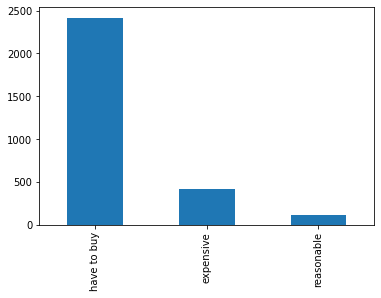

In [50]:
buy_or_giveup.value_counts().plot.bar()

`cut` 함수를 사용하면 더욱 쉽게 수치형 데이터를 범주형 데이터로 변환할 수 있습니다.   
- `bins`와 `labels` 옵션을 사용합니다. 

In [ ]:
# 수치형 데이터를 범주형 데이터로 쉽게 바꿀 수 있는 cut 함수(map을 짧게 표현 - record를 단 한 줄로 표현할 수도 있음)
# 온라인 강의를 듣고 배우기

Q. `map` 연산을 사용해서 시리즈에 저장된 값으로 학점을 판별하라.
- 90점 이상이면 A
- 70점 이상이면 B
- 나머지 F

연산 적용 결과
```
영수    A
철수    B
영희    F
```

In [ ]:
s = Series([94, 74, 30], index=['영수', '철수', '영희'])


Q. `map` 연산을 사용해서 시리즈에 저장된 값에 다음 연산을 적용하라. 
- 0 이상 이면 값을 2배 키우고,
- 0 보다 작으면 값을 10 뺀다

연산 적용 결과
```
0    20
1     6
2   -13
dtype: int64
```

In [ ]:
s = Series([10, 3, -3])

### 시리즈 정렬
`sort_values` 메서드를 사용하면 쉽게 데이터를 정렬할 수 있습니다.  
- `ascending` 값에 따라 오름차순 혹은 내림차순으로 정렬됩니다.   
-> 온라인 강의로 대체

In [ ]:
from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ["000010", "000020", "000030", "000040"]
s = Series(data=data, index=index)



`sort_index` 메서드는 인덱스를 기준으로 정렬합니다.

### 데이터 순위
`rank` 메서드는 순위를 측정합니다.

### 데이터 갯수 세기

시리즈에 저장된 데이터들의 출현 빈도를 세는 함수 `value_counts`

In [ ]:
import numpy as np

s = Series(np.random.randint(10, size=100))
